In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

df = pd.read_csv('final.csv') # read data from the cleaned csv (to get the sum of amount awarded for each city) 

In [17]:
pd.set_option('display.float_format', lambda x: '%.f' % x) # removes scientific notation of numbers
df2 = df.groupby(['city'], as_index=False)['amount_awarded'].sum().round() # grouped the total of amount awarded per city, and rounded it for flat numbers. Index set to false so that the city column is not used as the index, and creates a numerical system for index instead
df3 = df2.sort_values(['city'], ascending=True) # used to display the amount awarded dataframe in alphebetical order by city column
df3.drop([23, 25], inplace=True) # dropped the cities on this dataframe that were not in the population csv 
df3.reset_index(drop=True, inplace=True) # reset the index numerically, after rows

In [18]:
pop = pd.read_csv('population_data.csv') # read data from the population csv (2nd csv, will combine data from 2 csvs to create a plot)

In [19]:
pop2 = pop.groupby(['city_name'], as_index=False)[['Estimates Base']].sum() # grouped the total of estimates base per city. Index set to false so that the city column is not used as the index, and creates a numerical system for index instead

In [33]:
frames = [pop2, df3] # set the 2 data frames with the information that I need, and assigned them to a variable
result1 = pd.concat(frames, axis=1) # concatted the dataframes, and set them side by side instead of one on top of the other

In [34]:
result1

,city_name,Estimates Base,city,amount_awarded
0,"Atlanta, Georgia",427059,Atlanta,4761182
1,"Baton Rouge, Louisiana",229423,Baltimore,18432748
2,"Boston, Massachusetts",617792,Baton Rouge,2879795
3,"Cambridge, Massachusetts",105148,Boston,11905482
4,"Charleston, South Carolina",120364,Charleston,1520250
5,"Chicago, Illinois",2695652,Chicago,467586464
6,"Cincinnati, Ohio",297025,Cincinnati,2472787
7,"Cleveland, Ohio",396665,Cleveland,28573475
8,"Columbia, South Carolina",130421,Columbia,1030935
9,"Detroit, Michigan",713898,Detroit,57702989


In [21]:
result.drop(columns=['city_name'], inplace=True) # removed the extra column city_name

In [22]:
first_column = result.pop('city') # remove city from current column, and assigned it to first_column variable
result.insert(0, 'city', first_column) # assigned city to be the first column for easier read

In [23]:
middle_column = result.pop('amount_awarded') # remove amount awarded from current column, assigned it to middle_column variable
result.insert(1, 'amount_awarded', middle_column) # assigned amount awarded to be the middle column for easier read

In [24]:
result['per_capita'] = result['amount_awarded']/result['Estimates Base'] # created a fourth column called per_capita, with the results of dividing the amount awarded column by the estimates base column

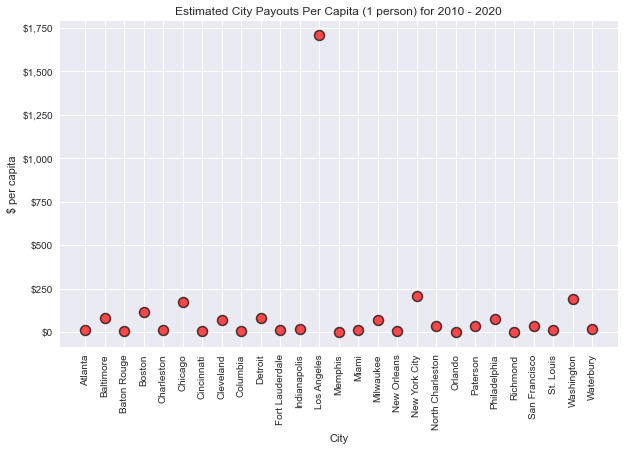

In [25]:
plt.style.use('seaborn') # to get seaborn style plot layout
fig, ax = plt.subplots(figsize=(10, 6)) # plotting one subplot with defined figure size
ax.scatter(x = result['city'], y = result['per_capita'], s= 100, color = "red", edgecolors = "black", linewidths = 1.5, alpha = 0.7) # customizing scatter plot to show the data that I want it to display

plt.title('Estimated City Payouts Per Capita (1 person) for 2010 - 2020') # setting the title of the plot
plt.xlabel("City") # setting the x axis label
plt.xticks(rotation=90) # rotating the x ticks 90 degrees so they display vertically
plt.ylabel("$ per capita") # setting the y axis label
ax.yaxis.set_major_formatter('${x:,.0f}') # formatting the text on the y axis to include the $ sign and commas

plt.show()

In [35]:
pop

,id,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,city_name
0,1,8175133,8175031,8190209,8272948,8346693,8396091,8433806,8463049,8469153,8437478,8390081,8336817,"New York City, New York"
1,2,3792621,3793139,3795512,3820876,3851202,3881622,3909901,3938568,3963226,3975788,3977596,3979576,"Los Angeles, California"
2,3,2695598,2695652,2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976,"Chicago, Illinois"
3,6,1526006,1526012,1528283,1540466,1551824,1558313,1565460,1571065,1576051,1580601,1583592,1584064,"Philadelphia, Pennsylvania"
4,16,805235,805184,805505,815650,828876,839572,850750,863010,871512,878040,880696,881549,"San Francisco, California"
5,17,820445,820457,821579,827664,835499,844696,850164,853714,859049,863478,870960,876384,"Indianapolis (balance), Indiana"
6,20,601723,601767,605226,619800,634924,650581,662328,675400,685815,694906,701547,705749,"Washington, District of Columbia"
7,21,617594,617792,621048,630505,642955,653002,662855,670491,679848,687788,691147,692600,"Boston, Massachusetts"
8,24,713777,713898,711131,705118,700183,691868,682609,679410,677143,674631,672977,670031,"Detroit, Michigan"
9,28,646889,651873,652326,655341,658786,657146,654990,654106,652548,650878,651104,651073,"Memphis, Tennessee"
